In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
launches = pd.read_csv('global_space_launches.csv')

## Rocket Launches Dataset Head Sample

In [3]:
launches.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


## Rocket Launches Dataset Description

In [4]:
launches.describe

<bound method NDFrame.describe of      Company Name                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1           CASIC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4317      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4318         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4321    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                                            Detail  Status Rocket  Rocket  \
0     Falcon 9 Block 5 |

## Rocket Launches Dataset Info

In [5]:
launches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company Name                4322 non-null   object 
 1   Location                    4322 non-null   object 
 2   Detail                      4322 non-null   object 
 3   Status Rocket               4322 non-null   object 
 4   Rocket                      962 non-null    float64
 5   Status Mission              4322 non-null   object 
 6   Country of Launch           4322 non-null   object 
 7   Companys Country of Origin  4322 non-null   object 
 8   Private or State Run        4322 non-null   object 
 9   DateTime                    4322 non-null   object 
 10  Year                        4322 non-null   int64  
 11  Month                       4322 non-null   int64  
 12  Day                         4322 non-null   int64  
 13  Date                        4322 

## Cost of Rocket Launches Over Time Linear Regression Modelling

In [6]:
launches_cost_year_filtered = launches[launches['Year'] > 1979][['Year', 'Rocket']].dropna()
launches_cost_year_filtered.Rocket = pd.to_numeric(launches_cost_year_filtered.Rocket, errors='ignore')

X = launches_cost_year_filtered['Year'].values
y = launches_cost_year_filtered['Rocket'].values

In [7]:
X = X.reshape(-1, 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

print(f'X_train shape: [{x_train.shape}]')
print(f'X_test shape: [{x_test.shape}]')
print(f'y_train shape: [{y_train.shape}]')
print(f'y_test shape: [{y_test.shape}]')


X_train shape: [(738, 1)]
X_test shape: [(185, 1)]
y_train shape: [(738,)]
y_test shape: [(185,)]


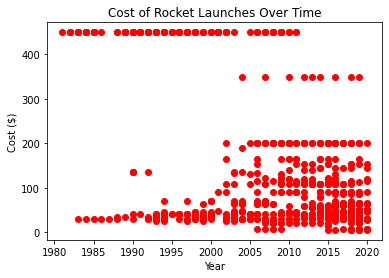

In [9]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Year')
plt.ylabel('Cost ($)')
plt.title('Cost of Rocket Launches Over Time')
plt.show()

In [10]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [11]:
y_predict = lm.predict(x_test)

print(f'Training dataset accuracy: {round(lm.score(x_train, y_train)*100, 2)}%')
print(f'Testing dataset accuracy: {round(lm.score(x_test, y_test)*100, 2)}%')

Training dataset accuracy: 27.91%
Testing dataset accuracy: 26.97%


[]

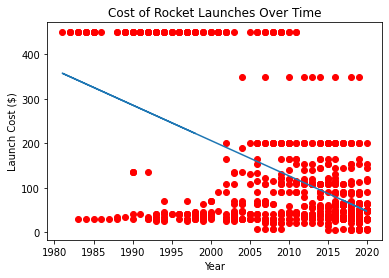

In [12]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Year')
plt.ylabel('Launch Cost ($)')
plt.title('Cost of Rocket Launches Over Time')
plt.plot()

## Conclusions
1. Increased privatization of space travel in the last 20 years has led to technical and procedural innovations which reduce total launch costs.
2. Relaxation of regulations on commercial space flight will promote increased launch activity at more affordable prices.
3. Marked differences in exogenous economic and political conditions before and after the fall of the Soviet Union spurred demand for more cost-effective launch vehicles due to precipitous declines in government financing available for space activities.
4. Refinement of core spaceflight technologies and practices relative to first and second generation launch platforms, as well as reduced fiscal burden for basic research and development, have led to lower total launch costs.